In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('prada')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('prada', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
942,942,1225363553122705409,1580984411,2020-02-06 10:20:11,ParaTiOnline,La diseñadora Agatha Ruiz de la Prada presentó...,none,0.0,NaN,NaN,...,31,1610,200,NaN,2010-06-07 14:18:36,NaN,agatharuizdelaprada; madrid; mfw,False,La diseñadora Agatha Ruiz de la Prada presentó...,diseñadora agatha ruiz presentar colección mo...
2262,2262,1225408886020231168,1580995220,2020-02-06 13:20:20,ParaTiOnline,La diseñadora Agatha Ruiz de la Prada presentó...,none,0.0,NaN,NaN,...,31,1610,200,NaN,2010-06-07 14:18:36,NaN,agatharuizdelaprada; madrid; mfw,False,La diseñadora Agatha Ruiz de la Prada presentó...,diseñadora agatha ruiz presentar colección mo...
2585,2585,1225417142381797376,1580997188,2020-02-06 13:53:08,messageplicity,Prada will undergo sensitivity training after ...,none,0.0,NaN,NaN,...,1914,16975,380,NaN,2013-07-06 17:28:58,GMA,Business; Fashion,False,Prada will undergo sensitivity training after ...,undergo sensitivity training racially offensi...
3040,3040,1225423950836064256,1580998811,2020-02-06 14:20:11,ParaTiOnline,La diseñadora Agatha Ruiz de la Prada presentó...,none,0.0,NaN,NaN,...,31,1610,200,NaN,2010-06-07 14:18:36,NaN,agatharuizdelaprada; madrid; mfw,False,La diseñadora Agatha Ruiz de la Prada presentó...,diseñadora agatha ruiz presentar colección mo...
4071,4071,1225439047427989505,1581002411,2020-02-06 15:20:11,ParaTiOnline,La diseñadora Agatha Ruiz de la Prada presentó...,none,0.0,NaN,NaN,...,31,1610,200,NaN,2010-06-07 14:18:36,NaN,agatharuizdelaprada; madrid; mfw,False,La diseñadora Agatha Ruiz de la Prada presentó...,diseñadora agatha ruiz presentar colección mo...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['02',
 '19th',
 '1m',
 '20',
 '2020',
 '20th',
 'abigail',
 'absolutely',
 'acc',
 'accessory',
 'adrianamarin',
 'adrivolta',
 'adut',
 'agatha',
 'agatharuizdela',
 'airpod',
 'akech',
 'alejandrobetancou',
 'almost',
 'am',
 'announce',
 'antídoto',
 'apparently',
 'appearance',
 'armani',
 'arrival',
 'arrive',
 'ask',
 'attend',
 'auction',
 'autumn',
 'available',
 'avantgarde',
 'aw20',
 'backstage',
 'bag',
 'balenciaga',
 'barkin',
 'be',
 'beautiful',
 'beauty',
 'benvenuta',
 'benvenutalalisa',
 'best',
 'bias',
 'black',
 'blackpink',
 'blogger',
 'bof',
 'boot',
 'brand',
 'british',
 'brown',
 'bts',
 'burberry',
 'business',
 'button',
 'campaign',
 'car',
 'catriona',
 'cautivar',
 'celebrare',
 'celebrity',
 'cest',
 'chanel',
 'check',
 'chic',
 'chinese',
 'cinema',
 'city',
 'claim',
 'cliché',
 'close',
 'clothes',
 'clothing',
 'co',
 'coat',
 'colección',
 'collection',
 'color',
 'come',
 'comment',
 'complejidad',
 'conference',
 'congrat',
 'conspiracy',
 'co

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

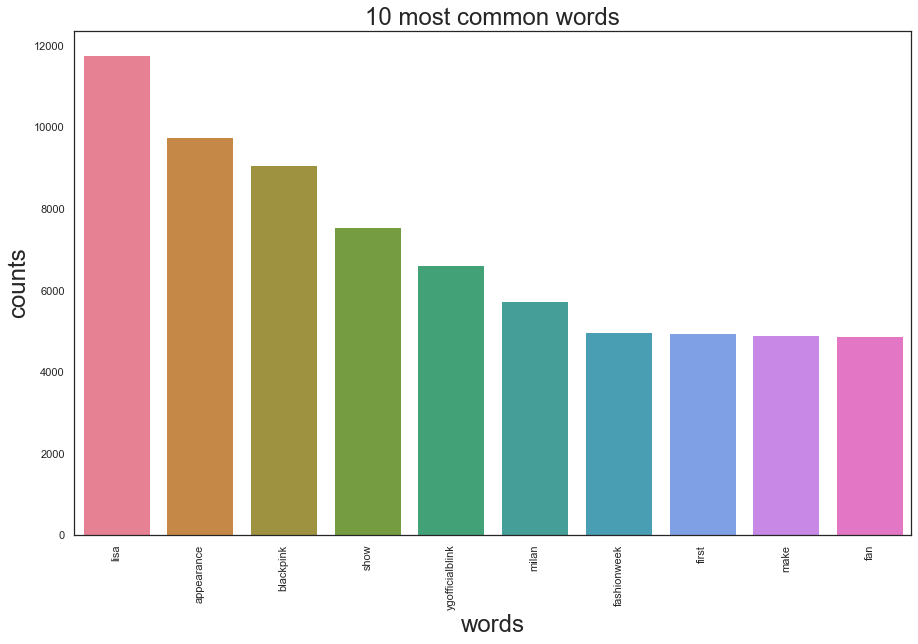

In [8]:
plot_10_most_common_words(tf,vectorizer)

# GridSearch the best model

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import multiprocessing
import sklearn.utils

random_state = 1234

In [10]:
cpu = multiprocessing.cpu_count()-1

In [34]:
# Define Search Param
search_params = {'n_components': [3,5,7,10,15,20,25], 'learning_decay': [.6, .7, .9]}

with sklearn.utils.parallel_backend('threading', n_jobs=3):
    # Init the Model
    lda = LatentDirichletAllocation(learning_method = 'online', n_jobs=cpu, evaluate_every = -1, random_state=1234) # random state for reproducibility
    # Init Grid Search Class
    grid_model = GridSearchCV(lda, param_grid=search_params, verbose=4)


    # Do the Grid Search
    grid_model.fit(tf)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] learning_decay=0.6, n_components=3 ..............................[CV] learning_decay=0.6, n_components=3 ..............................

[CV] learning_decay=0.6, n_components=3 ..............................


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


[CV]  learning_decay=0.6, n_components=3, score=-183375.940, total= 3.1min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-113798.481, total= 3.1min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-201157.729, total= 3.1min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-195123.383, total= 3.3min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-138679.644, total= 3.5min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-207978.172, total= 3.5min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-138076.240, total= 3.0min
[CV] learning_decay=0.6, n_components=5 .........

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 24.9min


[CV]  learning_decay=0.6, n_components=10, score=-227135.886, total= 3.9min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-220600.922, total= 4.5min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-132544.784, total= 3.6min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-222059.122, total= 3.1min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=15, score=-160680.988, total= 2.8min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=15, score=-244173.925, total= 2.2min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=20, score=-238828.693, total= 2.7min
[CV] learning_decay=0.6, n_components=20 .

[CV]  learning_decay=0.9, n_components=5, score=-193851.706, total= 2.4min
[CV] learning_decay=0.9, n_components=5 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-117582.560, total= 2.6min
[CV] learning_decay=0.9, n_components=5 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-192567.128, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-140785.365, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-219907.027, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=7, score=-198511.319, total= 2.5min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=7, score=-114279.853, total= 2.4min
[CV] learning_decay=0.9, n_components=7 .........

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 81.1min


[CV]  learning_decay=0.9, n_components=15, score=-196671.003, total= 2.2min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=15, score=-144299.830, total= 2.2min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=15, score=-232689.617, total= 2.1min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-234442.819, total= 2.7min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-124484.781, total= 2.6min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-209787.585, total= 2.3min
[CV] learning_decay=0.9, n_components=25 .............................
[CV]  learning_decay=0.9, n_components=20, score=-152477.948, total= 2.3min
[CV] learning_decay=0.9, n_components=25 .

[Parallel(n_jobs=3)]: Done 105 out of 105 | elapsed: 93.3min finished


In [35]:
# Best Model
best_lda_model = grid_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.6, 'n_components': 3}
Best Log Likelihood Score:  -166427.035289169
Model Perplexity:  42.47289333442181


In [37]:
import pickle
# pickle best lda model
filename = './models/best_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))

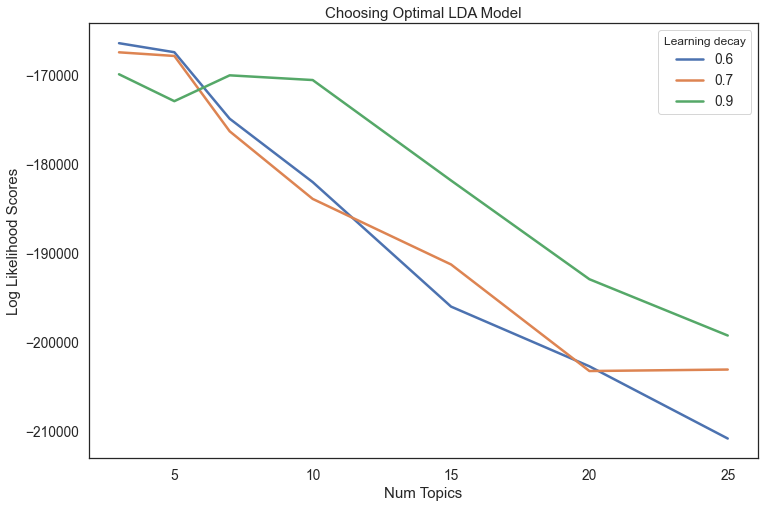

In [38]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [3,5,7,10,15,20,25]

log_likelihoods_6 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.6]
log_likelihoods_7 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.7]
log_likelihoods_9 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelihoods_6, label='0.6')
plt.plot(n_topics, log_likelihoods_7, label='0.7')
plt.plot(n_topics, log_likelihoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig('optimal_LDA_model.png')
plt.show()

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 11
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [11]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [12]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -639377.1397655327
Perplexity:  30.42644027437526
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 11, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [13]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [ ]:
array

In [16]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
fashionweek non donna vero forza femminilità riconoscere mai stancare secondo celebrare punto dominare film cliché giornata milan fw20 newyork time

Topic #1:
mfw lalisa lisa blackpink yg ygofficialblink ygent_official trend benvenutalalisa italy worldwide still see ever most popular jaylim1 celebrity philippines thai

Topic #2:
mfw2020 mfw lalisawears برادا lisa lisax قبل اثناء بلاك ميلان بينك قورجس_اسبوع_الموضه حضورها ساعات عرض ready wear readytowear photography fashionweek2020

Topic #3:
appearance make fan first fashionweek milan show lisa blackpink public member year suit chinese ygofficialblink lalisaxfw golden fascinate time congrat

Topic #4:
vogue runway fashion show mfw close day happy go armani last be first conspiracy hold wild giorgio announce corona livestream

Topic #5:
mfw fashion gigi hadid style fw20 milano backstage mfy lalisax collection name lalisawears best celebrity there lisa sfilata sneaker simons

Topic #6:
gettyimage nightwalk

In [17]:
array

[['fashionweek',
  'non',
  'donna',
  'vero',
  'forza',
  'femminilità',
  'riconoscere',
  'mai',
  'stancare',
  'secondo',
  'celebrare',
  'punto',
  'dominare',
  'film',
  'cliché',
  'giornata',
  'milan',
  'fw20',
  'newyork',
  'time'],
 ['mfw',
  'lalisa',
  'lisa',
  'blackpink',
  'yg',
  'ygofficialblink',
  'ygent_official',
  'trend',
  'benvenutalalisa',
  'italy',
  'worldwide',
  'still',
  'see',
  'ever',
  'most',
  'popular',
  'jaylim1',
  'celebrity',
  'philippines',
  'thai'],
 ['mfw2020',
  'mfw',
  'lalisawears',
  'برادا',
  'lisa',
  'lisax',
  'قبل',
  'اثناء',
  'بلاك',
  'ميلان',
  'بينك',
  'قورجس_اسبوع_الموضه',
  'حضورها',
  'ساعات',
  'عرض',
  'ready',
  'wear',
  'readytowear',
  'photography',
  'fashionweek2020'],
 ['appearance',
  'make',
  'fan',
  'first',
  'fashionweek',
  'milan',
  'show',
  'lisa',
  'blackpink',
  'public',
  'member',
  'year',
  'suit',
  'chinese',
  'ygofficialblink',
  'lalisaxfw',
  'golden',
  'fascinate',
  'ti

In [38]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

#### As we can see the topic 7 is about CORONAVIRUS. This is interesting since prada's evento was on the same day the virus started to spread in Italy.

We can save the model so not to have to generate it again

In [39]:
pyLDAvis.save_html(LDAvis_prepared, './prada_'+ str(number_of_topics) +'.html')

Create a dataframe containing topic-word

In [19]:
df = pd.DataFrame(columns=['topic','word'])

In [20]:
df

,topic,word


In [27]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [30]:
df.to_csv('topic_word_prada.csv')